<a href="https://colab.research.google.com/github/limlimlim99/limjihyeonjjang/blob/main/ohe_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 넘파이를 이용한 원-핫 인코딩 ohe
import numpy as np

samples = ['The cat sat in the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1   #인덱스 0은 사용하지 않음
  
max_length = 10 # 각 샘플에서 max_length까지 단어만 사용
results = np.zeros((len(samples), max_length, max(token_index.values())+1)) #3차원(2,10,11)

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1.

In [ ]:
results

# 넘파이를 이용해 sample을 원핫인코딩 함

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'in': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [ ]:
# 케라스를 이용한 ohe
from keras_preprocessing.text import Tokenizer

samples = ['The cat sat in the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)   #가장 빈도가 높은 1000개의 단어만 선택하는 Tokenizer 객체 생성

tokenizer.fit_on_texts(samples) #단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples)  #문자열을 정수 인덱스의 리스트로 변환

ohe_results = tokenizer.texts_to_matrix(samples, mode="binary")

word_index = tokenizer.word_index

print("Found %s unique tokens." %len(word_index))

Found 9 unique tokens.


In [ ]:
print(word_index)

{'the': 1, 'cat': 2, 'sat': 3, 'in': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
ohe_results[0,:10]

array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [ ]:
ohe_results[1,:10]
# 해당되는 인덱스만 1로 해주고 나머지는 0으로 해줌

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 1.])

In [ ]:
# cs: 축약형
# csr: 한단계 더 축약형
# => 파이썬 완벽가이드 참조

#### Embedding
- 단어와 벡터를 연관짓는 강력하고 인기 있는 또 다른 방법은 단어 임베딩이라는 밀집 단어 벡터를 사용하는 것이다. 
- 원-핫 인코딩으로 만든 벡터는 희소하고(대부분 0으로 채워집니다) 고차원이다(어휘 사전에 있는 단어의 수와 차원이 같다). 
- 반면 단어 임베딩은 저차원의 실수형 벡터이다(희소 벡터의 반대인 밀집 벡터이다). 그림 6-2를 참고
- 원-핫 인코딩으로 얻은 단어 벡터와 달리 단어 임베딩은 데이터로부터 학습된다. - 보통 256차원, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024차원의 단어 임베딩을 사용한다.
- 반면 원-핫 인코딩은 (20,000개의 토큰으로 이루어진 어휘 사전을 만들려면) 20,000차원 또는 그 이상의 벡터일 경우가 많다. 
- 따라서 단어 임베딩이 더 많은 정보를 적은 차원에 저장한다.
-
- (문서 분류나 감성 예측과 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습합니다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습합니다.
- 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드합니다. 이를 사전 훈련된 단어 임베딩이라고 합니다.
-
- 실제 단어 임베딩 공간에서 의미 있는 기하학적 변환의 일반적인 예는 '성별' 벡터와 '복수(plural)' 벡터ㅇ이다. 
- 예를 들어 'king' 벡터에 'female' 벡터를 더하면 'queen' 벡터가 된다. 'plural' 벡터를 더하면 'kings'가 된다. #연산 
- 단어 임베딩 공간은 전형적으로 이런 해석 가능하고 잠재적으로 유용한 수천 개의 벡터를 특성으로 가진다.
- 사람의 언어를 완벽하게 매핑해서 어떤 자연어 처리 작업에도 사용할 수 있는 이상적인 단어 임베딩 공간은 아직 가능하지 않다. 사람의 언어에도 그런 것은 없다. 
- 세상에는 많은 다른 언어가 있고 언어는 특정 문화와 환경을 반영하기 때문에 서로 동일하지 않다. 
- 실제로 좋은 단어 임베딩 공간을 만드는 것은 문제에 따라 크게 달라진다. - 영어로 된 영화 리뷰 감성 분석 모델을 위한 완벽한 단어 임베딩 공간은 영어로 된 법률 문서 분류 모델을 위한 완벽한 임베딩 공간과 다를 것 이다. 특정 의미 관계의 중요성이 작업에 따라 다르기 때문이다.
- 따라서 새로운 작업에는 새로운 임베딩을 학습하는 것이 타당하다. 
- 다행히 역전파를 사용해 쉽게 만들 수 있고 케라스를 사용하면 더 쉽다. `Embedding` 층의 가중치를 학습하면 된다.


In [ ]:
# men women quuen king

In [ ]:
from tensorflow.keras.layers import Embedding

Embedding_layer = Embedding(1000, 64)

#### IMDB 영화 감성 예측

In [ ]:
# IMDB데이터를 가지고 Embedding

from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000 # 특성으로 사용할 단어의 수를 10000개로 제한(빈번한 단어10000개)
maxlen = 20  # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용 20개로 잘라줌)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)  # 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환
x_test =  preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_train.shape

(25000, 20)

In [ ]:
x_test.shape

(25000, 20)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(1000, 8, input_length=maxlen))  #8은 embedding dimensionality
# 출력 크기는 (samples, maxlen, 8) # 8차원
# Flatten으로 펼칠 때는 3D 임베딩 텐서를  (samples, maxlen * 8)크기의 2D텐서로 펼침
model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 8)             8000      
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6703 - acc: 0.6228 - val_loss: 0.6249 - val_acc: 0.6868
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5634 - acc: 0.7257 - val_loss: 0.5486 - val_acc: 0.7162
Epoch 3/10
625/625 [==============================] 

#### 원본 IMDB 텍스트 다운로드

In [ ]:
# 원본IMDB 데이터를 가지고 Embedding

In [1]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  9001k      0  0:00:09  0:00:09 --:--:-- 16.5M


In [2]:
ls

aclImdb/  aclImdb_v1.tar.gz  drive/  sample_data/


In [9]:
!rm -r aclImdb/train/unsup

rm: cannot remove 'aclImdb/train/unsup': No such file or directory


In [10]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [12]:
import os
imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')   #연결을 해줌

labels = []  # 중괄호 {} : dictionary
texts = []   # 대괄호 [] : list

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':    #자리수가 4개 -4부터 끝까지
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [23]:
texts[0]

'I basically found Eden\'s Curve to be a very poorly constructed that made it difficult to watch. However, there is something I must say about how the director captured something about the atmosphere of the early 70\'s in the choice of settings and clothing. The "back to the earth" philosophy and the interest in sexual exploration and drugs that was not dramatically decadent, as portrayed in many later versions of the 70\'s was right on, as was the "don\'t ask don\'t tell" pseudo-liberalism of the fraternity made up of east-coast intellectuals, except that I would have thought this was more likely of a New England school rather than one in Virginia, where I imagine the "good ole boy" mentality still dominated even elitist schools like this one. Another thing I appreciated and could relate to is that this was a time when homosexuality was not linked so much to leathermen or drag queens and I appreciated some homosexual roles not related to these terribly overused images. I felt it was v

In [17]:
# 데이터 토큰화(벡터화)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen=100
training_samples=200
validation_samples=10000
max_words=10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)  #text->sequence

word_index = tokenizer.word_index
len(word_index)

88582

In [18]:
import numpy as np
data = pad_sequences(sequences, maxlen=maxlen)  #pad_sequences를 써서 길이를 통일시킴
labels = np.asarray(labels) #넘파이 배열로 바꿔줌
print(data.shape, labels.shape)

(25000, 100) (25000,)


In [20]:
# 훈련세트와 검증세트 분할

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]  #처음~training_samples까지(200개)
y_train = labels[:training_samples] #10000+200=> 10200개
x_val = data[training_samples : training_samples + validation_samples] # #10000+200=> 10200개
y_val = labels[training_samples : training_samples + validation_samples] #10000+200=> 10200개

In [24]:
print(len(texts))

25000


In [25]:
print(len(sequences))

25000


In [27]:
len(sequences[0])

225

In [ ]:
word_index.items()
# key, value 다 나옴
# 각각의 인덱스에 대해 key, value가 다 있음

In [32]:
print(data.shape)
data[0]

(25000, 100)


array([  37,   11, 1389,    2,   70, 2885,  439, 6614,   70,  915,    2,
       1778,  523, 1334,   57, 2796,    6, 7590,    1, 1382,  266,    5,
        755,   43,   28,    4,    1,  595,   88, 1127,  385, 3680,  117,
         30,   24, 2762,  122,    6, 2862, 5267,   85,    4,   91, 7862,
          7,    7,   21,   14,   49,   14,  132,  120,  540, 2368,    6,
          4,    3,  726, 8921, 1725,    1,  327,   14,   70,   14,  741,
       4850,    2,  480,  135,  138,   70,  718,   30,    1,  950, 1049,
          6,  479,    7,    7,   22,  121, 2796,  124, 7637,    9,   53,
          8,   28,  840,  133,   18, 5267,   85,   42, 2598,   84,  133,
         96], dtype=int32)

In [43]:
# glove 글로브
glove_dir = '/content/drive/MyDrive'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word]=coefs
f.close()

print(len(embeddings_index))


400000


In [44]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
    if embedding_vector is not None:     # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
      embedding_matrix[i] = embedding_vector

In [45]:
embeddings_index.get('the')
# the에 대한 value

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [46]:
print(embedding_matrix.shape)
embedding_matrix[10]

(10000, 100)


array([-0.046539  ,  0.61966002,  0.56647003, -0.46584001, -1.18900001,
        0.44599   ,  0.066035  ,  0.31909999,  0.14679   , -0.22119001,
        0.79238999,  0.29905   ,  0.16073   ,  0.025324  ,  0.18678001,
       -0.31000999, -0.28108001,  0.60514998, -1.0654    ,  0.52476001,
        0.064152  ,  1.03579998, -0.40779001, -0.38011   ,  0.30801001,
        0.59964001, -0.26991001, -0.76034999,  0.94221997, -0.46919   ,
       -0.18278   ,  0.90652001,  0.79671001,  0.24824999,  0.25713   ,
        0.6232    , -0.44768   ,  0.65357   ,  0.76902002, -0.51229   ,
       -0.44332999, -0.21867   ,  0.38370001, -1.14830005, -0.94397998,
       -0.15062   ,  0.30012   , -0.57805997,  0.20175   , -1.65910006,
       -0.079195  ,  0.026423  ,  0.22051001,  0.99713999, -0.57538998,
       -2.72659993,  0.31448001,  0.70521998,  1.43809998,  0.99125999,
        0.13976   ,  1.34739995, -1.1753    ,  0.0039503 ,  1.02980006,
        0.064637  ,  0.90886998,  0.82871997, -0.47003001, -0.10

In [59]:
# 모델 정의하기, 훈련
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) 
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix]) # 모델에 Glove임베딩 로드
model.layers[0].trainable = False  #사전 훈련된 부분이 업데이트 되면 안됨

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 130ms/step - loss: 2.4418 - acc: 0.4650 - val_loss: 0.8713 - val_acc: 0.4944
Epoch 2/10
7/7 [==============================

In [51]:
# 데이터가 적으면 안됨
#파라미터: 132065개 나옴

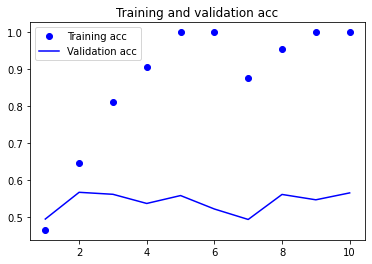

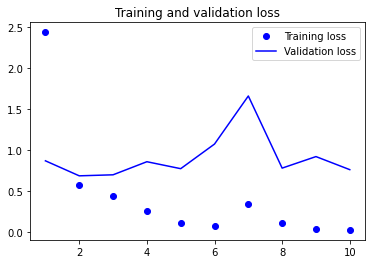

In [60]:
# 그림그리기~
import matplotlib.pyplot as plt
accuracy = history.history["acc"]
val_accuracy = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training acc")
plt.plot(epochs, val_accuracy, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [61]:
model.save_weights('/content/drive/MyDrive/model12000.h5')

In [64]:
# 평가
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []

for labels_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':   
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1) 

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [66]:
model.save_weights('/content/drive/MyDrive/model12000.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8151 - acc: 0.5296


[0.8151047825813293, 0.5296000242233276]

In [67]:
model.load_weights('/content/drive/MyDrive/model12000.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8151 - acc: 0.5296


[0.8151047825813293, 0.5296000242233276]